In [ ]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 13.8 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
env = gym.make('Taxi-v3', max_episode_steps=200, render_mode="rgb_array")

In [ ]:
env.observation_space

Discrete(500)

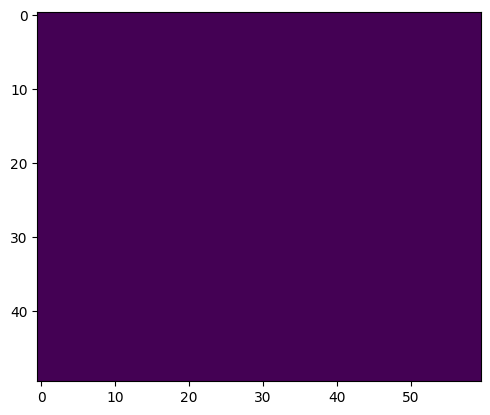

In [ ]:
qtable = np.zeros((env.observation_space.n, env.action_space.n))
plt.imshow(qtable.reshape(50,60))

In [ ]:
qtable.shape

(500, 6)

In [ ]:
epsilon_decay = .01
max_epsilon = 1
min_epsilon = .001
epochs = 25000
gamma = 0.99
lr = .01

In [ ]:
rewards = []
for epoch in range(epochs):
  terminated, truncated = False, False
  epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay * epoch)
  if (epoch+1) % (epochs // 100) == 0: print('\r', epoch+1, '/', epochs, ', ', \
                                      (epoch+1)*100/epochs,'% done.', end='')
  treward = 0
  state, info = env.reset()
  while not terminated and not truncated:
    if np.random.random() > gamma: action = np.argmax(qtable[state])
    else: action = env.action_space.sample()
    new_state, reward, terminated, truncated, info = env.step(action)
    qtable[state][action] = qtable[state][action] + lr * (reward + gamma * \
                                    np.max(qtable[new_state]) - qtable[state][action])
    state = new_state
    treward += reward
  rewards.append(treward)

 25000 / 25000 ,  100.0 % done.

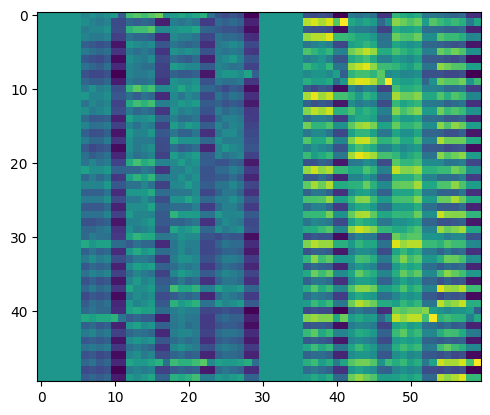

In [ ]:
plt.imshow(qtable.reshape(50, 60))

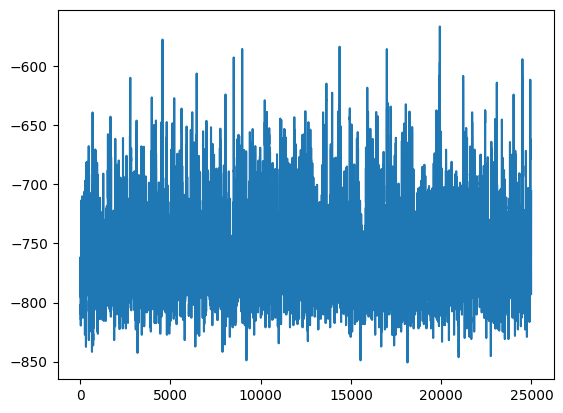

In [ ]:
avg_rewards = [sum(rewards[i:i+10])/10 for i in range(len(rewards) - 10)]
plt.plot(avg_rewards)


In [ ]:
# np.save('./taxi-qtable.npy', qtable)

In [ ]:
import time

In [ ]:
env.reset()
terminated, truncated = False, False
rewards = []
images = []

while not terminated and not truncated:
  images.append(env.render())
  action = np.argmax(qtable[state])
  state, reward, terminated, truncated, _ = env.step(action)
  rewards.append(reward)

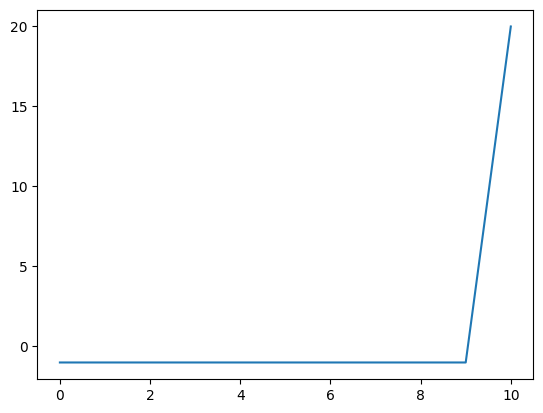

In [ ]:
plt.plot(rewards)

In [ ]:
from matplotlib import animation
def save_frames_as_gif(frames, path='./', filename='gym_animation.gif', fps=30, dpi=72):

    #Mess with this to change frame size
    plt.figure(figsize=(frames[0].shape[1] / dpi, frames[0].shape[0] / dpi), dpi=dpi)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='ffmpeg', fps=fps)

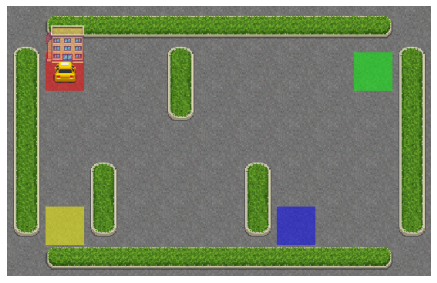

In [ ]:
save_frames_as_gif(images, filename='video.mp4', fps=2)